# Library Needed

In [1]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import json
import os

# BMI Calculation and Categorization

In [2]:
DATA_FILE = 'bmi_data.json'

def calculate_bmi(weight, height_meters):
    return weight / (height_meters ** 2)

def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obesity"

# Data Storage

In [3]:
def save_data(weight, height, bmi, category):
    if os.path.exists(DATA_FILE):
        with open(DATA_FILE, 'r') as file:
            data = json.load(file)
    else:
        data = []
    
    data.append({
        'weight': weight,
        'height': height,
        'bmi': bmi,
        'category': category,
        'date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    })
    
    with open(DATA_FILE, 'w') as file:
        json.dump(data, file)

def load_data():
    if os.path.exists(DATA_FILE):
        with open(DATA_FILE, 'r') as file:
            return json.load(file)
    return []


# Delete All Data Function

In [4]:
def delete_all_data():
    if os.path.exists(DATA_FILE):
        os.remove(DATA_FILE)
        messagebox.showinfo("Success", "All data has been deleted.")
    else:
        messagebox.showinfo("No Data", "No data file found to delete.")


# Data Visualization For Recent

In [5]:
def visualize_recent_data():
    data = load_data()
    if not data:
        messagebox.showinfo("No Data", "No data to visualize.")
        return
    
    # Use only the most recent entry
    entry = data[-1]
    
    try:
        date = datetime.strptime(entry['date'], '%Y-%m-%d %H:%M:%S')
        bmi = entry['bmi']
        category = entry['category']
    except KeyError as e:
        print(f"KeyError: Missing {e} in entry: {entry}")
        messagebox.showinfo("Data Error", "Recent data is missing required fields.")
        return
    
    # Plot a single bar for the recent entry
    plt.figure(figsize=(6, 4))
    plt.bar(date, bmi, color="blue", edgecolor="black")
    plt.xlabel('Date')
    plt.ylabel('BMI')
    plt.title('Most Recent BMI Entry')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


# Data Visualization For All Data

In [6]:
def visualize_all_data():
    data = load_data()
    if not data:
        messagebox.showinfo("No Data", "No data to visualize.")
        return
    
    dates = []
    bmis = []
    categories = []

    for entry in data:
        try:
            date = datetime.strptime(entry['date'], '%Y-%m-%d %H:%M:%S')
            bmi = entry['bmi']
            category = entry['category']
            dates.append(date)
            bmis.append(bmi)
            categories.append(category)
        except KeyError as e:
            print(f"KeyError: Missing {e} in entry: {entry}")
        except ValueError as e:
            print(f"ValueError: {e} for entry: {entry}")

    if not dates:
        messagebox.showinfo("No Valid Data", "No valid data to visualize.")
        return
    
    # Create a color map for categories
    colors = {
        "Underweight": "blue",
        "Normal weight": "green",
        "Overweight": "orange",
        "Obesity": "red"
    }
    
    plt.figure(figsize=(12, 6))
    
    # Plot each entry with a different color based on category
    for category in set(categories):
        category_dates = [dates[i] for i in range(len(categories)) if categories[i] == category]
        category_bmis = [bmis[i] for i in range(len(categories)) if categories[i] == category]
        
        plt.plot(category_dates, category_bmis, marker='o', linestyle='-', color=colors[category], label=category)
    
    plt.xlabel('Date')
    plt.ylabel('BMI')
    plt.title('BMI Trend Over Time')
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# GUI

In [7]:
def show_result():
    try:
        weight = float(weight_entry.get())
        height_cm = float(height_entry.get())
        
        if weight <= 0 or height_cm <= 0:
            raise ValueError("Weight and height must be positive numbers.")
        
        height_meters = height_cm / 100  # Convert height from cm to meters
        bmi = calculate_bmi(weight, height_meters)
        category = classify_bmi(bmi)
        
        result_label.config(text=f"Your BMI is: {bmi:.2f}\nCategory: {category}")
        
        # Save data
        save_data(weight, height_cm, bmi, category)
        
    except ValueError as e:
        messagebox.showerror("Input Error", str(e))

def reset_fields():
    weight_entry.delete(0, tk.END)
    height_entry.delete(0, tk.END)
    result_label.config(text="")

def retrieve_data():
    data = load_data()
    if not data:
        messagebox.showinfo("No Data", "No data to display.")
        return
    
    data_str = "\n".join(
        f"Weight: {entry.get('weight', 'N/A')} kg, Height: {entry.get('height', 'N/A')} cm, BMI: {entry.get('bmi', 'N/A'):.2f}, Category: {entry.get('category', 'N/A')}, Date: {entry.get('date', 'N/A')}"
        for entry in data
    )
    messagebox.showinfo("Saved Data", data_str)


# Main Window

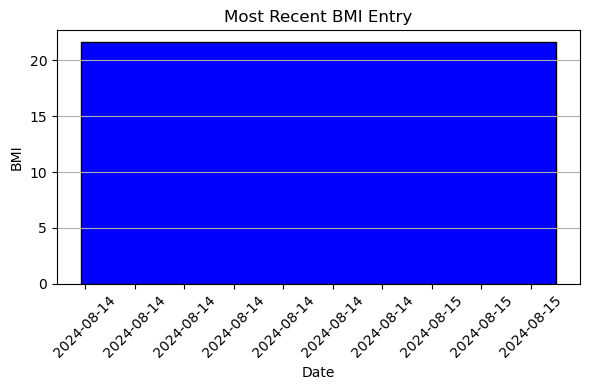

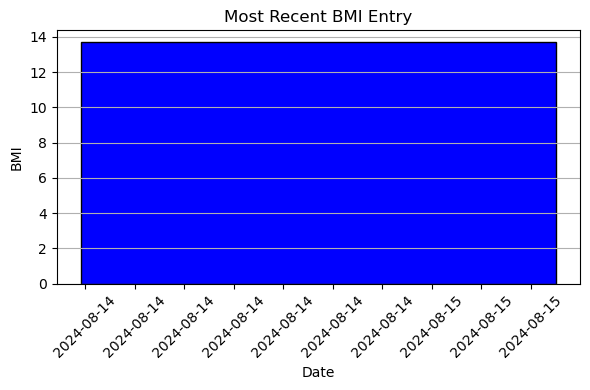

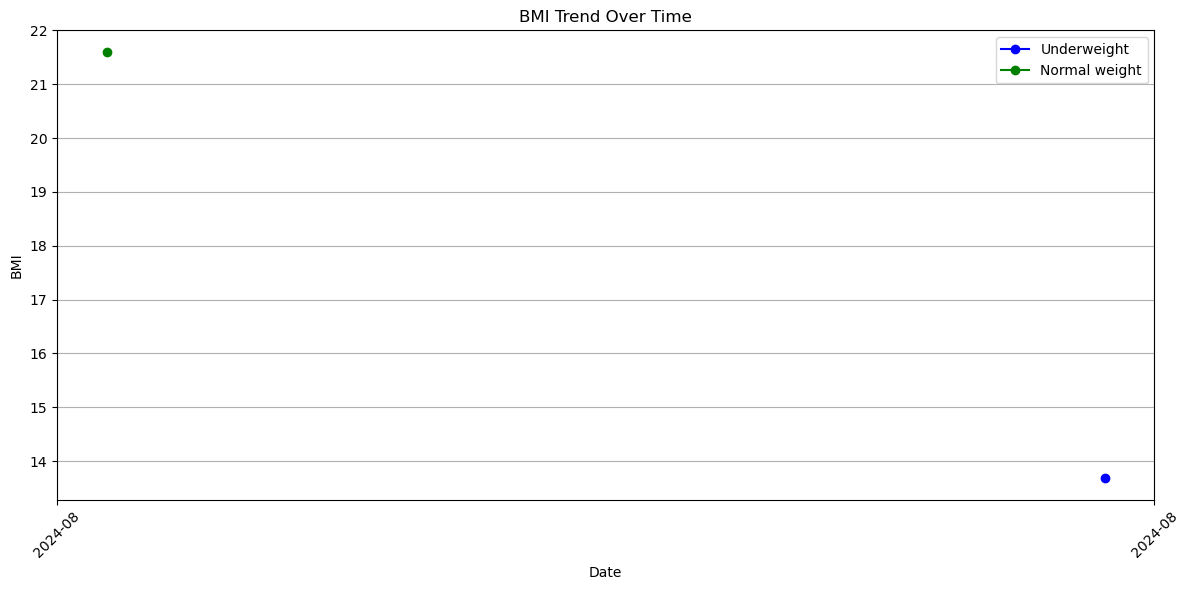

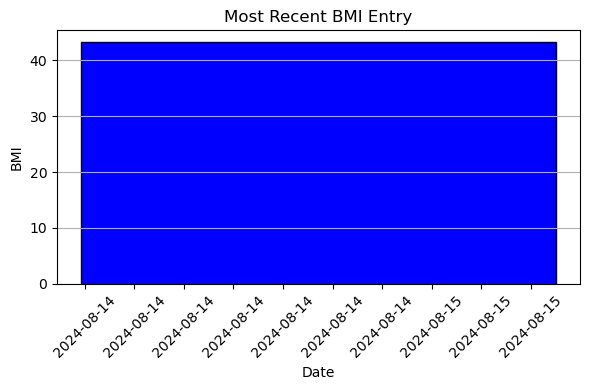

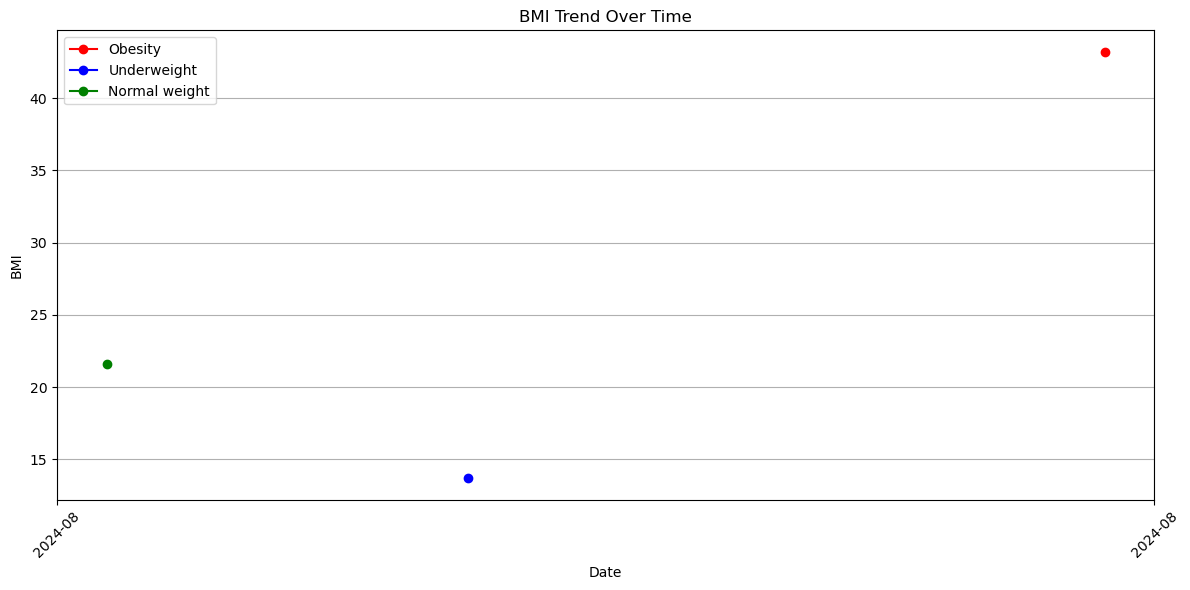

In [9]:
root = tk.Tk()
root.title("BMI Calculator")

# Create and place widgets
tk.Label(root, text="Weight (kg):").grid(row=0, column=0)
weight_entry = tk.Entry(root)
weight_entry.grid(row=0, column=1)

tk.Label(root, text="Height (cm):").grid(row=1, column=0)
height_entry = tk.Entry(root)
height_entry.grid(row=1, column=1)

tk.Button(root, text="Calculate BMI", command=show_result).grid(row=2, column=0, columnspan=2)
tk.Button(root, text="Visualize Recent Data", command=visualize_recent_data).grid(row=3, column=0, columnspan=2)
tk.Button(root, text="Visualize All Data", command=visualize_all_data).grid(row=4, column=0, columnspan=2)
tk.Button(root, text="Retrieve Data", command=retrieve_data).grid(row=5, column=0, columnspan=2)
tk.Button(root, text="Reset", command=reset_fields).grid(row=6, column=0, columnspan=2)
tk.Button(root, text="Delete All Data", command=delete_all_data).grid(row=7, column=0, columnspan=2)

result_label = tk.Label(root, text="")
result_label.grid(row=8, column=0, columnspan=2)

root.mainloop()
